In [1]:
import qutip as qt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
repeat = 5
methods = ["old", "inplace", "notinplace"]
results = []

for n in range(1, 8):
    for method in methods:
        print(f"n={n}, method={method}")
        for _ in range(repeat):
            x = qt.solver.heom.HEOMSolver(qt.sigmax(), qt.solver.heom.DrudeLorentzBath(qt.sigmaz(), 0.1, 10, 0.5, n), 15, method=method)
            print(f"{x._time} seconds")
            results.append((method, n, x._n_ados, x._time))
        print("----------\n")

n=1, method=old
0.00021474200002558064 seconds
0.00014389300122275017 seconds
0.0001244409995706519 seconds
0.0001933170005941065 seconds
0.00014070300130697433 seconds
----------

n=1, method=inplace
0.00018831399938790128 seconds
0.00019553099991753697 seconds
0.0001453159984521335 seconds
0.00012302799950703047 seconds
0.00015019000056781806 seconds
----------

n=1, method=notinplace
0.0002528040004108334 seconds
0.00027246900026511867 seconds
0.0002437310013192473 seconds
0.0002465390007273527 seconds
0.0002885060002881801 seconds
----------

n=2, method=old
0.0010762469992187107 seconds
0.0009152650000032736 seconds
0.0007541720005974639 seconds
0.000949985000261222 seconds
0.0007300950001081219 seconds
----------

n=2, method=inplace
0.0010453640006744536 seconds
0.0009107659989240346 seconds
0.0007903320001787506 seconds
0.0008061779990384821 seconds
0.0009648570012359414 seconds
----------

n=2, method=notinplace
0.0016996550002659205 seconds
0.0016691180007910589 seconds
0.001

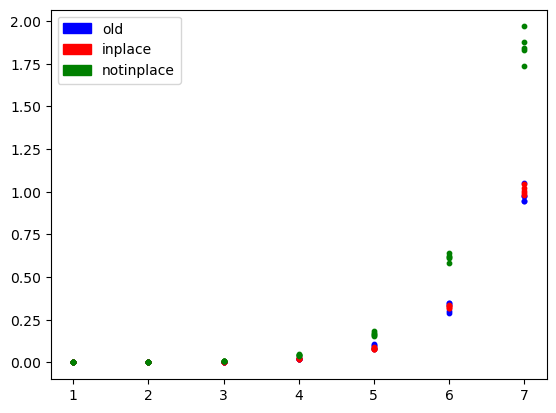

In [3]:
colors = {
    "old": "b",
    "inplace": "r",
    "notinplace": "g",
}

for meth, n, n_ados, t in results:
    plt.scatter([n], [t], color=colors[meth], s=10)

#plt.gca().set_yscale('log')
plt.legend(handles=[
    mpatches.Patch(color=colors[meth], label=meth) for meth in colors.keys()
])
plt.show()

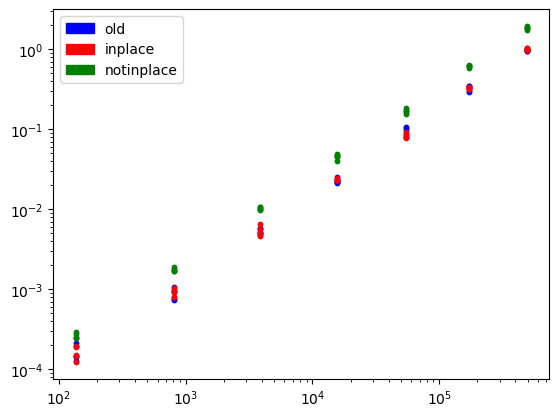

In [5]:
colors = {
    "old": "b",
    "inplace": "r",
    "notinplace": "g",
}

for meth, n, n_ados, t in results:
    plt.scatter([n_ados], [t], color=colors[meth], s=10)

plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.legend(handles=[
    mpatches.Patch(color=colors[meth], label=meth) for meth in colors.keys()
])
plt.show()

In [6]:
import numpy as np
result_dict = {}

for meth, n, n_ado, time in results:
    if (meth, n_ado) not in result_dict:
        result_dict[(meth, n_ado)] = []
    result_dict[(meth, n_ado)].append(time)

for meth, n_ado in result_dict.keys():
    print(f"Method {meth} / {n_ado} ADOs / avg. time {np.average(result_dict[(meth, n_ado)])}")

Method old / 136 ADOs / avg. time 0.0001634192005440127
Method inplace / 136 ADOs / avg. time 0.00016047579956648405
Method notinplace / 136 ADOs / avg. time 0.0002608098006021464
Method old / 816 ADOs / avg. time 0.0008851528000377584
Method inplace / 816 ADOs / avg. time 0.0009034994000103325
Method notinplace / 816 ADOs / avg. time 0.001755943600073806
Method old / 3876 ADOs / avg. time 0.005303944200204569
Method inplace / 3876 ADOs / avg. time 0.005370432799463742
Method notinplace / 3876 ADOs / avg. time 0.010283965799681027
Method old / 15504 ADOs / avg. time 0.022501081999871532
Method inplace / 15504 ADOs / avg. time 0.023512295999898923
Method notinplace / 15504 ADOs / avg. time 0.04525704980005685
Method old / 54264 ADOs / avg. time 0.09477766900054121
Method inplace / 54264 ADOs / avg. time 0.08314173759972618
Method notinplace / 54264 ADOs / avg. time 0.16873060620018804
Method old / 170544 ADOs / avg. time 0.3259791518001293
Method inplace / 170544 ADOs / avg. time 0.3279